<a href="https://colab.research.google.com/github/brentshierk/LoLGreypaper/blob/master/LeagueOfLegendsGreypaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install mlrose


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import warnings
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import pandas_profiling as ppr
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [26]:
file = '/content/drive/MyDrive/eth/high_diamond_ranked_10min.csv'
info = pd.read_csv(file)
data = pd.read_csv(file)



In [27]:
info

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5,46,3,0,4,7,7,0,0,0,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8,12,21,1,4,6,3,0,0,0,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3,14,0,1,7,6,11,1,1,0,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9,66,4,0,3,2,1,0,0,0,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [28]:
info.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [29]:
info.blueWins.value_counts(normalize=True)

0    0.500962
1    0.499038
Name: blueWins, dtype: float64

In [30]:
plt.bar(info.blueWins.unique(),info.blueWins.value_counts(),color=("r","b"),tick_label=("L","W"))

<BarContainer object of 2 artists>

Text(0, 0.5, 'red kills')

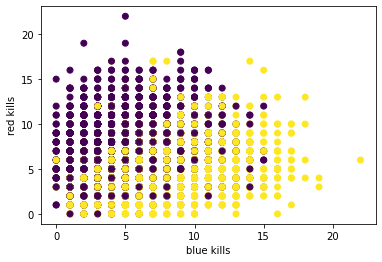

In [183]:
plt.scatter(info.blueKills,info.redKills,c=info.blueWins)
plt.xlabel("blue kills")
plt.ylabel("red kills")

In [31]:
plt.scatter(info.blueAssists,info.redAssists,c=info.blueWins)
plt.xlabel("blue assists")
plt.ylabel("red assists")

Text(48.736111111111114, 0.5, 'red assists')

In [34]:
info.blueTotalGold.where(info.blueWins==0).sort_values(ascending=False).head(2)

9608    21055.0
6137    20887.0
Name: blueTotalGold, dtype: float64

In [32]:
plt.scatter(data.blueTotalGold,data.redTotalGold,c=data.blueWins)
plt.vlines(21056,12000,24000,color= "red", linestyle=':')
plt.vlines(20000,12000,24000,color= "red", linestyle=':')
plt.axvspan(21100, 24000, color='g', alpha=0.5, lw=0)
plt.xlabel("blue gold")
plt.ylabel("red gold")

Text(48.736111111111114, 0.5, 'red gold')

In [38]:
print(info.blueGoldDiff.where(info.blueWins==0).sort_values(ascending=False).head(1))
print(info.blueGoldDiff.where(info.blueWins==1).sort_values(ascending=True).head(1))

9608    6744.0
Name: blueGoldDiff, dtype: float64
8459   -6324.0
Name: blueGoldDiff, dtype: float64


In [33]:
plt.scatter(data.blueGoldDiff,data.blueWins,c=data.blueWins)
plt.axvspan(-6324.0,6744.0,color='r',alpha=0.5,lw=0)
plt.ylabel("Lose                                             Win")
plt.xlabel("team gold")

Text(0.5, 26.3611111111111, 'team gold')

Text(0, 0.5, 'red vision')

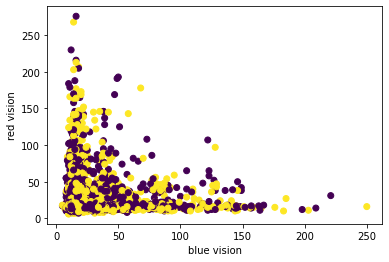

In [40]:
plt.scatter(info.blueWardsPlaced,info.redWardsPlaced,c=info.blueWins)
plt.xlabel("blue vision")
plt.ylabel("red vision")

In [34]:
info.columns


Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [35]:
corr_matrix=info.drop(["gameId",'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],axis=1).corr(method='pearson')
corr_matrix.iloc[:,0]

blueWins                        1.000000
blueWardsPlaced                 0.000087
blueWardsDestroyed              0.044247
blueFirstBlood                  0.201769
blueKills                       0.337358
blueDeaths                     -0.339297
blueAssists                     0.276685
blueEliteMonsters               0.221944
blueDragons                     0.213768
blueHeralds                     0.092385
blueTowersDestroyed             0.115566
blueTotalGold                   0.417213
blueAvgLevel                    0.357820
blueTotalExperience             0.396141
blueTotalMinionsKilled          0.224909
blueTotalJungleMinionsKilled    0.131445
blueGoldDiff                    0.511119
blueExperienceDiff              0.489558
blueCSPerMin                    0.224909
blueGoldPerMin                  0.417213
Name: blueWins, dtype: float64

In [ ]:
data.drop(["gameId",'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],axis=1).describe()

In [44]:
data.blueWins.where(((data.blueKills+data.blueAssists)/data.blueDeaths)>=3).dropna().value_counts(normalize=True)


1.0    0.765084
0.0    0.234916
Name: blueWins, dtype: float64

In [37]:
data.blueWins.where(data.blueTowersDestroyed>=1).dropna().value_counts(normalize=True)


1.0    0.75431
0.0    0.24569
Name: blueWins, dtype: float64

In [38]:
data.blueWins.where(data.blueKills>=8).dropna().value_counts(normalize=True)


1.0    0.69858
0.0    0.30142
Name: blueWins, dtype: float64

In [39]:
info["blueKDA"]=3
for i in range(0,len(info)):
    if data.blueDeaths[i] != 0:
        info["blueKDA"][i]=((data.blueKills[i]+data.blueAssists[i])/data.blueDeaths[i]).round(4)
    else:
        0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [40]:
info["redKDA"]=3
for i in range(0,len(info)):
    if data.redDeaths[i]!=0:
        info["redKDA"][i] = ((data.redKills[i]+data.redAssists[i])/data.redDeaths[i]).round(4)
    else:
        0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [41]:
info["blueKDADiff"]=info["blueKDA"]-info["redKDA"]


In [42]:
info["blueGoldAdv"]=3
for i in range(0,len(info)):
    if info["blueTotalGold"][i] >= info["blueTotalGold"][3464]:
        info["blueGoldAdv"][i] = 1
    else:
        info["blueGoldAdv"][i] = 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [43]:
info["blueDiffNeg"]=3
for i in range(0,len(info)):
    if info["blueGoldDiff"][i] <= info["blueGoldDiff"][8459]:
        info["blueDiffNeg"][i] = 1
    else:
        info["blueDiffNeg"][i] = 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [44]:
info["blueDiffPos"]=3
for i in range(0,9879):
    if info["blueGoldDiff"][i] >= info["blueGoldDiff"][9608]:
        info["blueDiffPos"][i] = 1
    else:
        info["blueDiffPos"][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [45]:
cols=['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin']
info[cols]

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5
9875,4527797466,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8
9876,4527713716,0,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3
9877,4527628313,0,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9


In [46]:
cols = ['blueTotalGold','blueTotalExperience','blueTotalMinionsKilled',
        'blueGoldDiff','blueExperienceDiff','blueGoldPerMin',
        'redTotalGold','redTotalExperience','redTotalMinionsKilled',
        'redGoldDiff','redExperienceDiff','redGoldPerMin']
standard = StandardScaler()
info[cols]=standard.fit_transform(info[cols])

In [47]:
info_x=info.drop(["gameId","blueWins"],axis=1)
info_y=info.blueWins

# K-Nearest Neighbors


In [48]:
cv=KFold(n_splits = 5, random_state=2022,shuffle=True)


In [49]:
np.sqrt(len(info_x))


99.39315871829409

In [50]:
##potiental best knn params
## algorithm : ball tree,kd tree, brute

In [52]:
knn_params = {"n_neighbors" :np.arange(95,105),
             "weights" : ["distance"],
             "algorithm" : ["ball_tree"] , #,"kd_tree","brute"
             "leaf_size":[1,2]}


In [53]:
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, knn_params,cv=5,verbose=2,n_jobs=-1)
grid_knn.fit(info_x,info_y)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree'], 'leaf_size': [1, 2],
                         'n_neighbors': array([ 95,  96,  97,  98,  99, 100, 101, 102, 103, 104]),
                         'weights': ['distance']},
             verbose=2)

In [54]:
knn_best_params=grid_knn.best_params_
knn_best_params

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'n_neighbors': 98,
 'weights': 'distance'}

In [55]:
knn = KNeighborsClassifier(algorithm="ball_tree",n_neighbors=98,weights="distance",leaf_size=1)


In [56]:
  np.mean(cross_val_score(knn,info_x,info_y,cv=cv,scoring="accuracy",n_jobs=-1))


0.7068527135755651

# Logistic Regression

In [170]:
## potiental best log params 
## penalty l1,l2,elasticnet
## solver newton-cg, lbfgs,sag,saga
## C 1,5,10,20,30,50,100
## warmstart True,False


In [60]:
log_params = {"penalty":["l2"],
              "solver":['lbfgs'],
             "C":[50],
             "warm_start":[True]}

In [61]:
logreg=LogisticRegression(penalty="l2",solver="lbfgs",C=50, max_iter=4000,warm_start=True)


In [62]:
log_grid = GridSearchCV(logreg,log_params,cv=cv,verbose=2,n_jobs=-1)


In [63]:
log_grid.fit(info_x,info_y)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=LogisticRegression(C=50, max_iter=4000, warm_start=True),
             n_jobs=-1,
             param_grid={'C': [50], 'penalty': ['l2'], 'solver': ['lbfgs'],
                         'warm_start': [True]},
             verbose=2)

# Random Forest

In [ ]:
## potiental best rdf params
## criterion: entropy,gini
## max depth: 2,4,6,8
## min samples split: 2,4,6
## max features: sqrt,log2

In [64]:
rdf_params={"criterion":["entropy"],
           "max_depth":[8],
           "min_samples_split":[4],
           "max_features":["sqrt"]}

In [65]:
rdf=RandomForestClassifier()


In [66]:
rdf_grid=GridSearchCV(rdf,rdf_params,cv=cv,verbose=2,n_jobs=-1)


In [67]:
rdf_grid.fit(info_x,info_y)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [8],
                         'max_features': ['sqrt'], 'min_samples_split': [4]},
             verbose=2)

In [68]:
np.mean(cross_val_score(rdf,info_x,info_y,cv=cv,scoring="accuracy",n_jobs=-1))


0.7238579921078256

# Ensemble Stacking

In [69]:
eclf = EnsembleVoteClassifier(clfs=[logreg, knn,rdf], weights=[1,1,1])
labels = ['Logistic Regression', 'KNN',"Random Forest",]
for clf, label in zip([logreg, knn, rdf], labels):

    scores = cross_val_score(clf, info_x, info_y, 
                             cv=cv, 
                             scoring='accuracy',
                             n_jobs=-1)

    print("[%s] Accuracy: %0.6f (+/- %0.6f) Best: %0.6f " 
          % (label,scores.mean(), scores.std(), scores.max()))


[Logistic Regression] Accuracy: 0.731653 (+/- 0.009943) Best: 0.743421 
[KNN] Accuracy: 0.706853 (+/- 0.013521) Best: 0.732794 
[Random Forest] Accuracy: 0.721024 (+/- 0.010797) Best: 0.738360 


In [70]:
X_train, X_test, y_train, y_test = train_test_split(info_x,info_y,random_state=666,test_size=0.3)


In [72]:
plt.figure()
lw = 1
#knn
knn.fit(X_train,y_train)
knn_pred = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test,knn_pred[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='tab:blue',
             lw=lw, label='KNN ROC curve (area = %0.4f)' % roc_auc)
#logreg
logreg.fit(X_train,y_train)
log_pred = logreg.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test,log_pred[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='tab:green',
             lw=lw, label='Logistic ROC curve (area = %0.4f)' % roc_auc)




#rdf
rdf.fit(X_train,y_train)
rdf_pred = rdf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test,rdf_pred[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='tab:brown',
             lw=lw, label='RandomForest ROC curve (area = %0.4f)' % roc_auc)





plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()


In [74]:
estimators = [
    ('knn', KNeighborsClassifier(algorithm= 'ball_tree', n_neighbors=98, weights= 'distance',leaf_size=1)),
    ('rdf', RandomForestClassifier(criterion="entropy",max_depth=8,max_features="sqrt",min_samples_split=4)),
    ('logreg',LogisticRegression(penalty="l2",solver="sag",warm_start=False,C=50)),
    
]


stack = StackingClassifier(estimators=estimators, 
                           final_estimator=LogisticRegression(penalty="l2",solver="sag",warm_start=False,C=50))

In [75]:
stack_score = cross_val_score(stack, info_x, info_y,cv=cv,scoring='accuracy',n_jobs=-1)


In [160]:
print(np.mean(stack_score),np.std(stack_score))
print(stack_score.max())

0.7311472864244349 0.008772779376299389
0.7393724696356275


In [ ]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100,)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(info_x, info_y)):
    stack.fit(info_x.iloc[train], info_y.iloc[train])
    viz = plot_roc_curve(stack, info_x.iloc[test], info_y.iloc[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()